# WWW::LLaMA

## In brief

This Raku package provides access to the machine learning service [llamafile](https://github.com/mozilla-Ocho/llamafile), [MO1].
For more details of the llamafile's API usage see [the documentation](https://github.com/mozilla-Ocho/llamafile?tab=readme-ov-file), [MO2].

This package is very similar to the packages 
["WWW::OpenAI"](https://github.com/antononcube/Raku-WWW-OpenAI), [AAp1], and 
["WWW::MistralAI"](https://github.com/antononcube/Raku-WWW-MistralAI), [AAp2]. 

"WWW::LLaMA" can be used with (is integrated with) 
["LLM::Functions"](https://github.com/antononcube/Raku-LLM-Functions), [AAp3], and
["Jupyter::Chatbook"](https://github.com/antononcube/Raku-Jupyter-Chatbook), [AAp5].

Also, of course, prompts from 
["LLM::Prompts"](https://github.com/antononcube/Raku-LLM-Prompts), [AAp4],
can be used with LLaMA's functions.

**Remark:** The package "WWW::OpenAI" can be also used to access 
["llamafile" chat completions](https://github.com/Mozilla-Ocho/llamafile/blob/main/llama.cpp/server/README.md#api-endpoints).
That is done by specifying appropriate base URL to the `openai-chat-completion` function.

-----

## Installation

Package installations from both sources use [zef installer](https://github.com/ugexe/zef)
(which should be bundled with the "standard" Rakudo installation file.)

To install the package from [Zef ecosystem](https://raku.land/) use the shell command:

```
zef install WWW::LLaMA
```

To install the package from the GitHub repository use the shell command:

```
zef install https://github.com/antononcube/Raku-WWW-LLaMA.git
```

----

## Install and run LLaMA server

In order to use the package access to LLaMA server is required.

Since the package follows closely the Web API of ["llamafile"](https://github.com/Mozilla-Ocho/llamafile/), [MO1],
it is advised to follow first the installation steps in the section of ["Quickstart"](https://github.com/Mozilla-Ocho/llamafile/tree/main#quickstart)
of [MO1] before trying the functions of the package.

----

## Usage examples

**Remark:** When the authorization key, `auth-key`, is specified to be `Whatever`
then it is assigned the string `sk-no-key-required`.
If an authorization key is required then the env variable `LLAMA_API_KEY` can be also used.

### Universal "front-end"

The package has an universal "front-end" function `llama-playground` for the 
[different functionalities provided by llamafile](https://github.com/Mozilla-Ocho/llamafile/blob/main/README.md).

Here is a simple call for a "chat completion":

In [33]:
use WWW::LLaMA;
llama-playground('What is the speed of a rocket leaving Earth?');

{content => 
it is about 11 km/s or 7 mi/s., generation_settings => {frequency_penalty => 0, grammar => , ignore_eos => False, logit_bias => [], min_p => 0.05000000074505806, mirostat => 0, mirostat_eta => 0.10000000149011612, mirostat_tau => 5, model => llava-v1.5-7b-Q4_K.gguf, n_ctx => 1365, n_keep => 0, n_predict => -1, n_probs => 0, penalize_nl => True, penalty_prompt_tokens => [], presence_penalty => 0, repeat_last_n => 64, repeat_penalty => 1.100000023841858, seed => 4294967295, stop => [], stream => False, temperature => 0.800000011920929, tfs_z => 1, top_k => 40, top_p => 0.949999988079071, typical_p => 1, use_penalty_prompt_tokens => False}, model => llava-v1.5-7b-Q4_K.gguf, prompt => What is the speed of a rocket leaving Earth?, slot_id => 2, stop => True, stopped_eos => True, stopped_limit => False, stopped_word => False, stopping_word => , timings => {predicted_ms => 332.803, predicted_n => 18, predicted_per_second => 54.08605090699302, predicted_per_token_ms => 18.48905555

Another one using Bulgarian:

In [2]:
llama-playground('Колко групи могат да се намерят в този облак от точки.', max-tokens => 300, random-seed => 234232, format => 'values');



### 2.3.3.1 Пример за обработка на вектор от числа от група G и използването му за получаване на домейни (предположим, че са 9)

Теглейки всичките домейни се случва, за да ги постави във вектора G. Ето код, който може да бъде използван за тегляне на всеки домейн:
```php
<script>
  var domain = "example.com"; // Предоставен домейна
  
  // Откриване на сортиран от G вектора с домейна
  var g = document.cookie, i = 0;
  while (g[i] != domain) {
    i++;
  }
  
  // Преместване на вектора назад на G-1
  for (var j = 1; j <= (g.length - 1); j++) {
    g[j] = g[j + 1];
  }
  
  // Откриване на предишната позиция на домейна в G
  var previousPosition = g.indexOf(domain) - 1;
</script>
```
### 2.

**Remark:** The functions `llama-chat-completion` or `llama-completion` can be used instead in the examples above.
(The latter is synonym of the former.)

### Models

The current LLaMA model can be found with the function `llama-model`:

In [3]:
llama-model;

llava-v1.5-7b-Q4_K.gguf

**Remark:** Since there is no dedicated API endpoint for getting the model(s),
the current model is obtained via "simple" (non-chat) completion.

### Code generation

There are two types of completions : text and chat. Let us illustrate the differences
of their usage by Raku code generation. Here is a text completion:

In [4]:
llama-completion(
        'generate Raku code for making a loop over a list',
        max-tokens => 120,
        format => 'values');


Here is an example Raku code for looping over a list:
```perl
my @list = (1, 2, 3, 4, 5);
for @list {
    print "The value of each element in the list is: ", .;
}
```

Here is a chat completion:

In [5]:
llama-completion(
        'generate Raku code for making a loop over a list',
        max-tokens => 120,
        format => 'values');

```
my @list = ('a', 'b', 'c');
for (@list) {
    say;
}
```

### Embeddings

Embeddings can be obtained with the function `llama-embedding`. Here is an example of finding the embedding vectors
for each of the elements of an array of strings:

In [6]:
my @queries = [
    'make a classifier with the method RandomForeset over the data dfTitanic',
    'show precision and accuracy',
    'plot True Positive Rate vs Positive Predictive Value',
    'what is a good meat and potatoes recipe'
];

my $embs = llama-embedding(@queries, format => 'values', method => 'tiny');
$embs.elems;

4

Here we show:
- That the result is an array of four vectors each with length 1536
- The distributions of the values of each vector

In [7]:
use Data::Reshapers;
use Data::Summarizers;

say "\$embs.elems : { $embs.elems }";
say "\$embs>>.elems : { $embs>>.elems }";
records-summary($embs.kv.Hash.&transpose);

$embs.elems : 4
$embs>>.elems : 4096 4096 4096 4096
+----------------------------------+-----------------------------------+----------------------------------+---------------------------------+
| 3                                | 2                                 | 0                                | 1                               |
+----------------------------------+-----------------------------------+----------------------------------+---------------------------------+
| Min    => -31.10409164428711     | Min    => -20.9927921295166       | Min    => -48.53635787963867     | Min    => -32.09341812133789    |
| 1st-Qu => -0.9602479636669159    | 1st-Qu => -1.0564637780189514     | 1st-Qu => -0.9600333869457245    | 1st-Qu => -0.64122653007507325  |
| Mean   => -0.03597551100104113   | Mean   => -0.013996119568616903   | Mean   => -0.01630680392362649   | Mean   => -0.013837544263530788 |
| Median => -0.0023602891888003795 | Median => -0.00040303252171725035 | Median => -0.0298971459

({0 => Min    => -48.53635787963867, 1 => Min    => -32.09341812133789, 2 => Min    => -20.9927921295166, 3 => Min    => -31.10409164428711} {0 => 1st-Qu => -0.9600333869457245, 1 => 1st-Qu => -0.64122653007507325, 2 => 1st-Qu => -1.0564637780189514, 3 => 1st-Qu => -0.9602479636669159} {0 => Mean   => -0.01630680392362649, 1 => Mean   => -0.013837544263530788, 2 => Mean   => -0.013996119568616903, 3 => Mean   => -0.03597551100104113} {0 => Median => -0.0298971459269523615, 1 => Median => 0.0045343921519815924, 2 => Median => -0.00040303252171725035, 3 => Median => -0.0023602891888003795} {0 => 3rd-Qu => 0.98794737458229065, 1 => 3rd-Qu => 0.62689220905303955, 2 => 3rd-Qu => 0.98250269889831545, 3 => 3rd-Qu => 0.938641220331192} {0 => Max    => 27.278060913085938, 1 => Max    => 22.0755672454834, 2 => Max    => 23.230640411376953, 3 => Max    => 24.812829971313477})

Here we find the corresponding dot products and (cross-)tabulate them:

In [8]:
use Data::Reshapers;
use Data::Summarizers;
my @ct = (^$embs.elems X ^$embs.elems).map({ %( i => $_[0], j => $_[1], dot => sum($embs[$_[0]] >>*<< $embs[$_[1]])) }).Array;

say to-pretty-table(cross-tabulate(@ct, 'i', 'j', 'dot'), field-names => (^$embs.elems)>>.Str);

+---+--------------+-------------+--------------+--------------+
|   |      0       |      1      |      2       |      3       |
+---+--------------+-------------+--------------+--------------+
| 0 | 14885.109778 |  788.298056 | -1780.109686 | -2712.137601 |
| 1 |  788.298056  | 7103.674998 | 1014.637115  |  514.939537  |
| 2 | -1780.109686 | 1014.637115 | 14473.649483 | 6428.325142  |
| 3 | -2712.137601 |  514.939537 | 6428.325142  | 14534.827169 |
+---+--------------+-------------+--------------+--------------+


**Remark:** Note that the fourth element (the cooking recipe request) is an outlier.
(Judging by the table with dot products.)

### Tokenizing and de-tokenizing

Here we tokenize some text:

In [9]:
my $txt = @queries.head;
my $res = llama-tokenize($txt, format => 'values');

[1207 263 770 3709 411 278 1158 16968 29943 2361 300 975 278 848 4489 29911 8929 293]

Here we get the original text be de-tokenizing:

In [10]:
llama-detokenize($res);

{content =>  make a classifier with the method RandomForeset over the data dfTitanic}

### Chat completions with engineered prompts

Here is a prompt for "emojification" (see the
[Wolfram Prompt Repository](https://resources.wolframcloud.com/PromptRepository/)
entry
["Emojify"](https://resources.wolframcloud.com/PromptRepository/resources/Emojify/)):

Here is an example of chat completion with emojification:

In [28]:
llama-chat-completion([ system => llm-prompt('Emojify')(), user => 'Python sucks, Raku rocks, and Perl is annoying'], max-tokens => 200, format => 'values')

👋🤖

### Vision

Consider the following [image](https://i.imgur.com/dtNEeHU.png):

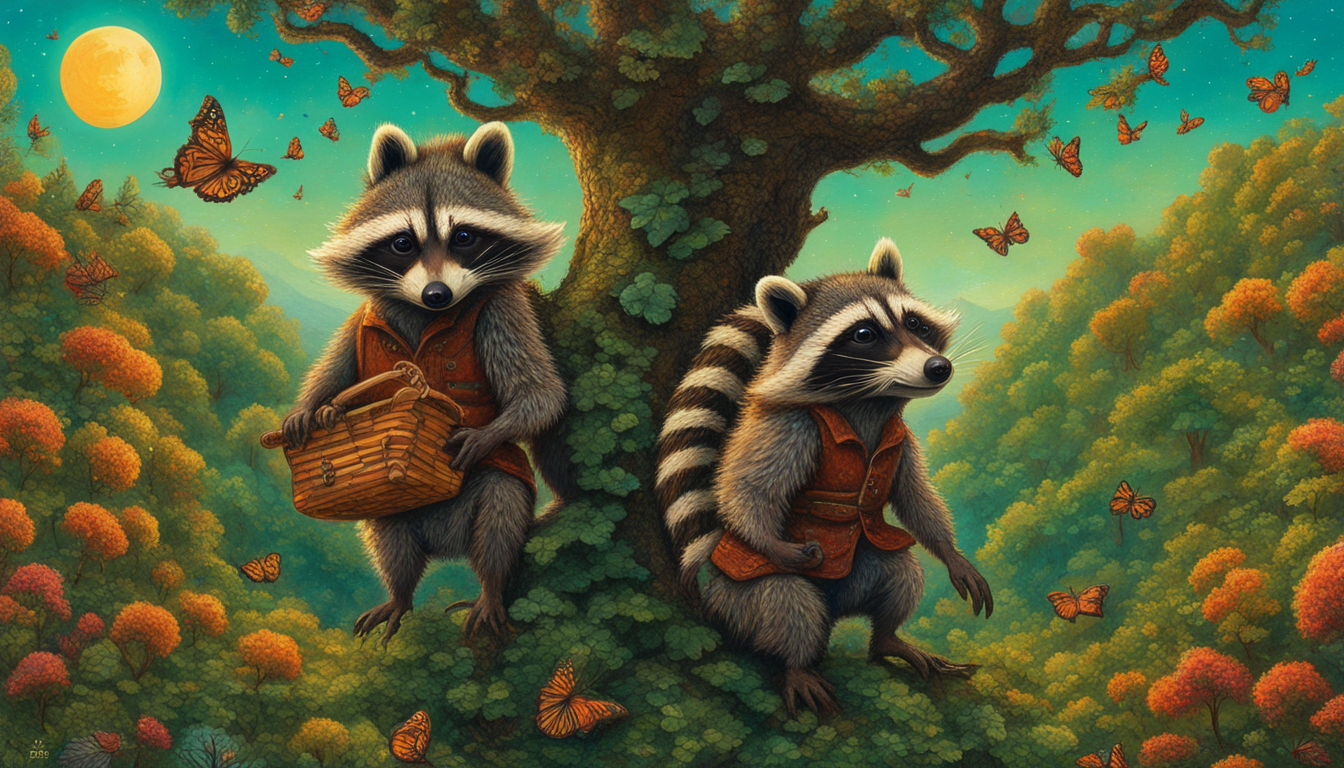

In [13]:
#% markdown
use Image::Markup::Utilities;

my $url ='https://i.imgur.com/dtNEeHU.png';
my $img = image-import($url);

Here we exemplify the use LLaMA "AI vision" capabilities:

In [14]:
my $img2 = image-import($url, format => 'asis');

llama-text-completion(
    "USER:[img-82]Describe the image.\nASSISTANT:",
    image-data => [{data => $img2, id => 82},],
    temperature => 0.16,
    format => 'values');

 The image features two cartoon raccoons sitting in a tree, each holding a basket. They appear to be enjoying their time together as they watch the butterflies flying around them. There are several butterflies scattered throughout the scene, with some close to the raccoons and others further away. The overall atmosphere of the image is peaceful and serene, capturing the beauty of nature and the interaction between the animals.

**Remark:** The AI vision seems to be a "hit or miss" -- approximately 50% the explanations have no relation to the given image.

-------

## Command Line Interface

### Playground access

The package provides a Command Line Interface (CLI) script:


In [15]:
#% bash
llama-playground --help

Usage:
  llama-playground [<words> ...] [--path=<Str>] [--mt|--max-tokens[=Int]] [-m|--model=<Str>] [-r|--role=<Str>] [-t|--temperature[=Real]] [--response-format=<Str>] [-a|--auth-key=<Str>] [--timeout[=UInt]] [-f|--format=<Str>] [--method=<Str>] [--base-url=<Str>] -- Command given as a sequence of words.
  
    --path=<Str>               Path, one of ''completions', 'chat/completions', 'embeddings', or 'models'. [default: 'chat/completions']
    --mt|--max-tokens[=Int]    The maximum number of tokens to generate in the completion. [default: 2048]
    -m|--model=<Str>           Model. [default: 'Whatever']
    -r|--role=<Str>            Role. [default: 'user']
    -t|--temperature[=Real]    Temperature. [default: 0.7]
    --response-format=<Str>    The format in which the response is returned. [default: 'url']
    -a|--auth-key=<Str>        Authorization key (to use LLaMA server Web API.) [default: 'Whatever']
    --timeout[=UInt]           Timeout. [default: 10]
    -f|--format=<Str>


**Remark:** When the authorization key, `auth-key`, is specified to be `Whatever`
then it is assigned the string `sk-no-key-required`.
If an authorization key is required then the env variable `LLAMA_API_KEY` can be also used.

--------

## Mermaid diagram

The following flowchart corresponds to the steps in the package function `llama-playground`:


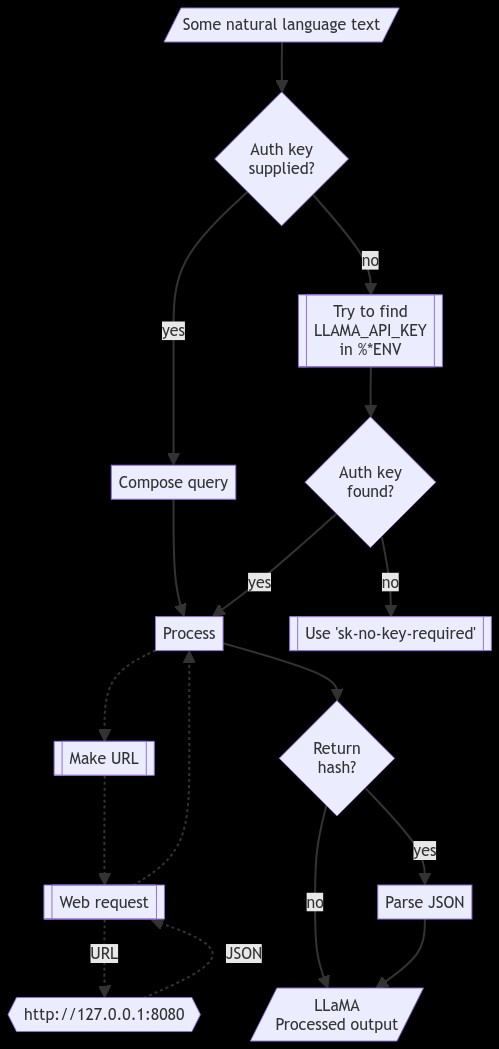

In [16]:
#% mermaid
graph TD
	UI[/Some natural language text/]
	TO[/"LLaMA<br/>Processed output"/]
	WR[[Web request]]
	LLaMA{{http://127.0.0.1:8080}}
	PJ[Parse JSON]
	Q{Return<br>hash?}
	MSTC[Compose query]
	MURL[[Make URL]]
	TTC[Process]
	QAK{Auth key<br>supplied?}
	EAK[["Try to find<br>LLAMA_API_KEY<br>in %*ENV"]]
	QEAF{Auth key<br>found?}
	NAK[["Use 'sk-no-key-required'"]]
	UI --> QAK
	QAK --> |yes|MSTC
	QAK --> |no|EAK
	EAK --> QEAF
	MSTC --> TTC
	QEAF --> |no|NAK
	QEAF --> |yes|TTC
	TTC -.-> MURL -.-> WR -.-> TTC
	WR -.-> |URL|LLaMA 
	LLaMA -.-> |JSON|WR
	TTC --> Q 
	Q --> |yes|PJ
	Q --> |no|TO
	PJ --> TO


--------

## References

### Packages

[AAp1] Anton Antonov,
[WWW::OpenAI Raku package](https://github.com/antononcube/Raku-WWW-OpenAI),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov,
[WWW::MistralAI Raku package](https://github.com/antononcube/Raku-WWW-MistralAI),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov,
[LLM::Functions Raku package](https://github.com/antononcube/Raku-LLM-Functions),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov,
[LLM::Prompts Raku package](https://github.com/antononcube/Raku-LLM-Prompts),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp5] Anton Antonov,
[Jupyter::Chatbook Raku package](https://github.com/antononcube/Raku-Jupyter-Chatbook),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[MO1] Mozilla Ocho, [llamafile](https://github.com/mozilla-Ocho/llamafile).

[MO2] Mozilla Ocho, [llamafile documentation](https://github.com/Mozilla-Ocho/llamafile/blob/main/README.md).